![alt text](um6p.png)

\begin{center}
***Abderahmane HAMDOUCHI***



**Master SDAD**

**UM6P**  \end{center}

\newpage


\vspace*{\stretch{1}}
**Description de tout le TP**

\newpage

## Chargement des libraries

In [ ]:
# run this cell to import nltk
import nltk
from os import getcwd
import csv
import re
import warnings
warnings.filterwarnings('ignore')

In [130]:
filePath = f"{getcwd()}/../tmp2/"
nltk.data.path.append(filePath)

In [131]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 

from utils import process_tweet, build_freqs

In [132]:
nltk.download('twitter_samples')

nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Chargement de positives et négatives tweets

In [179]:
# positifs et negatifs tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


## Définir ma fonction personnalisée de prétraitement

In [134]:
def my_process(all_tweets):
    if(type(all_tweets) is str):
        all_tweets=[all_tweets]
    processed_tweet = [tweet.lower() for tweet in all_tweets] 
    #processed_positive = [re.sub('[^a-zA-Z,.]', ' ', positive) for positive in processed_positive] 
    processed_tweet =[ re.sub(r'\s+', ' ', tweet) for tweet in processed_tweet] 

    processed_tweet= [process_tweet(tweet) for tweet in processed_tweet]
    return processed_tweet

## Appliquer la fonction my_process sur les tweets négatives

In [183]:
processed_negative = my_process(all_negative_tweets)
processed_negative[0]

['hopeless', 'tmr', ':(']

## Appliquer la fonction my_process sur les tweets négatives

In [182]:
processed_positive = my_process(all_positive_tweets)
processed_positive[0]

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

## Déifinir le modèle en affichant quelques attributs à savoir le modèle et le vecteur du word follow

In [185]:
from gensim.models import Word2Vec
# define training data
sentences = processed_positive+processed_negative
# train model
model = Word2Vec(sentences, min_count=5, workers=8)
# summarize the loaded model
print(model)

# access vector for one word
print(model['follow'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

    

Word2Vec(vocab=1690, size=100, alpha=0.025)
[ 5.01531959e-01  3.67040217e-01  2.38937631e-01  1.08702935e-01
  1.54985534e-02  2.39450812e-01  2.87945122e-01 -5.35700321e-01
  1.32256284e-01 -2.76650935e-01  1.03770785e-01  7.62577713e-01
 -1.80443093e-01  1.88712910e-01 -2.41729051e-01 -2.41091743e-01
  1.88823581e-01  7.52024800e-02  3.82672460e-03  3.50546390e-01
 -3.12930346e-01  1.24411076e-01  2.69297570e-01  3.22779678e-02
 -4.44279253e-01  3.37712228e-01  2.53204286e-01 -1.52209848e-01
 -3.42231281e-02  5.60826398e-02  5.52766681e-01  4.46395665e-01
  1.45001352e-01  8.30091015e-02  2.11668447e-01  2.53361970e-01
  8.50841403e-02  4.35931623e-01  3.59702766e-01  7.40043700e-01
 -3.51718396e-01  2.93964058e-01 -3.22997719e-02  2.67951608e-01
 -5.29950559e-01  2.25865543e-01 -2.48828590e-01 -2.11978897e-01
 -7.13110641e-02  5.82131520e-02  9.37286913e-02 -2.62803406e-01
 -3.27936292e-01 -2.13638589e-01  2.87564129e-01 -2.43420616e-01
 -1.75331041e-01  7.28091970e-02  2.84386337e-

## Ploter les différents mots meme si ils sont nombreux, alors qu'on peut les visualiser

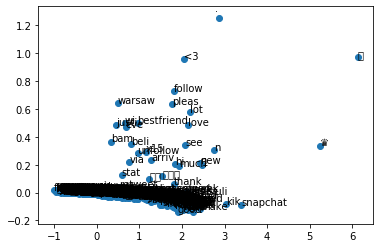

In [145]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Définir la méthode de prédiction personnelle qui se base sur la visualisation 

In [164]:

def my_predict(my_model,my_tweet):
    sentence_processed=my_process(my_tweet)
    print(sentence_processed)
    X = my_model[sentence_processed[0]]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # create a scatter plot of the projection
    pyplot.scatter(result[:, 0], result[:, 1])
    words = list(sentence_processed[0])
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    pyplot.show()

## On applique la méthode sur 2 tweets au choix 

### premier tweet

[['bad', 'movi', 'movi', 'terribl', 'sad', 'end']]


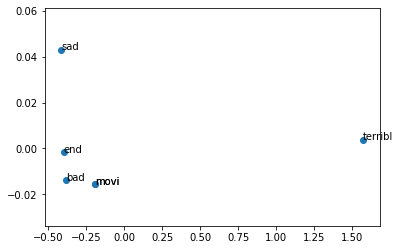

In [165]:
my_tweet = 'This is a bad  movie. The movie was terrible and I was sad until the ending!'
my_model = Word2Vec.load('model.bin')
my_predict(my_model,my_tweet)

### Deuxième tweet

[['cat', 'bad', 'friend', 'hous', 'car', 'turn', 'hous', 'open', 'door', 'made', 'pictur', 'sorri', 'danc']]


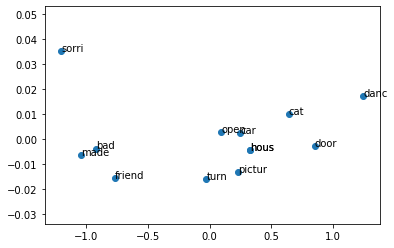

In [175]:
my_tweet = 'The cat is bad. my friend is on his house.  The car turned the house. She opened the door. he made a picture. I m sorry.  I danced.'

my_predict(my_model,my_tweet)